In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (7, 5)

In [2]:
data = pd.read_csv(r"DWLR_Dataset_2023.csv")

data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]

data.rename(columns={
    'water_level_m': 'water_level',
    'temperature_c': 'temperature',
    'rainfall_mm': 'rainfall',
    'ph': 'ph',
    'dissolved_oxygen_mg_l': 'oxygen'
}, inplace=True)

print("Columns after renaming:", data.columns.tolist(), "\n")

display(data.head())
data.info()

Columns after renaming: ['date', 'water_level', 'temperature', 'rainfall', 'ph', 'oxygen'] 



,date,water_level,temperature,rainfall,ph,oxygen
0,2023-01-01,2.124836,-0.601831,26.958453,6.948386,8.282231
1,2023-01-02,2.099955,0.396578,15.306932,6.952946,7.998230
2,2023-01-03,2.146121,0.139768,29.263846,6.912783,8.173989
3,2023-01-04,2.196756,0.327833,8.246142,6.972447,8.079537
4,2023-01-05,2.115765,-0.917756,35.654194,6.962424,8.425726


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   water_level  365 non-null    float64
 2   temperature  365 non-null    float64
 3   rainfall     365 non-null    float64
 4   ph           365 non-null    float64
 5   oxygen       345 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [3]:
data = data.dropna(subset=['water_level', 'rainfall', 'temperature', 'ph', 'oxygen']).reset_index(drop=True)

features = ['rainfall', 'temperature', 'ph', 'oxygen']
X = data[features]
y = data['water_level']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
pca = PCA(n_components=4)
pca.fit(X_scaled)

pca_components = pd.DataFrame(
    pca.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("=== PCA Component Loadings ===")
display(pca_components.round(3))


=== PCA Component Loadings ===


,rainfall,temperature,ph,oxygen
PC1,0.636,0.643,0.194,0.381
PC2,-0.261,-0.253,0.817,0.448
PC3,-0.195,-0.122,-0.543,0.808
PC4,-0.700,0.713,0.022,-0.046


In [7]:
explained_var = pca.explained_variance_ratio_
print("=== Explained Variance by Each PC ===")
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var*100:.2f}%")


=== Explained Variance by Each PC ===
PC1: 51.45%
PC2: 26.27%
PC3: 18.80%
PC4: 3.48%


In [8]:
loading_scores = np.abs(pca_components.loc['PC1'])
sorted_loadings = loading_scores.sort_values(ascending=False)

print("=== Factors Most Influencing Water Level (from PC1) ===")
display(sorted_loadings)


=== Factors Most Influencing Water Level (from PC1) ===


temperature    0.643002
rainfall       0.635659
oxygen         0.380830
ph             0.193529
Name: PC1, dtype: float64

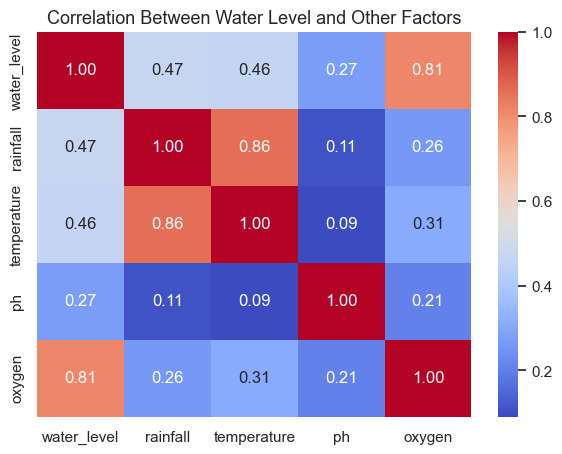

In [9]:
plt.figure(figsize=(7, 5))
sns.heatmap(data[['water_level'] + features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Water Level and Other Factors", fontsize=13)
plt.show()


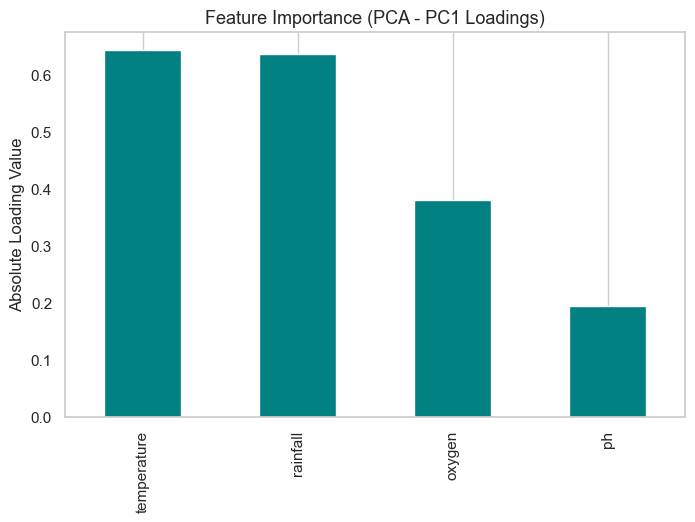

In [10]:
plt.figure(figsize=(8, 5))
sorted_loadings.plot(kind='bar', color='teal')
plt.title("Feature Importance (PCA - PC1 Loadings)", fontsize=13)
plt.ylabel("Absolute Loading Value")
plt.grid(axis='y')
plt.show()

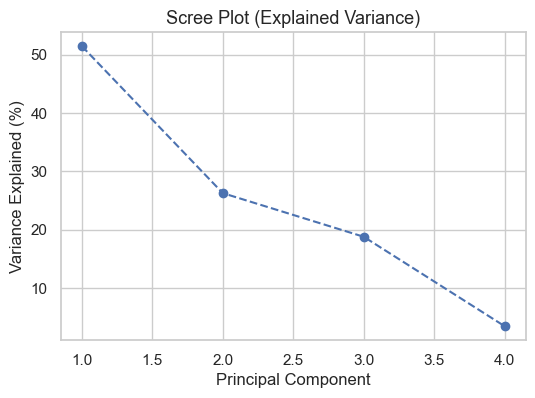

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_var)+1), explained_var*100, marker='o', linestyle='--')
plt.title("Scree Plot (Explained Variance)", fontsize=13)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.grid(True)
plt.show()
